# Prerequisite
* Load required packages and load images (already uploaded on  blackboard content) in Colab
* Create your own copy of notebook and add required code snippets in between the questions subsections. Also display the figures at each stage.
*Colab can be exported as a notebook file or Python file by **File > Download .ipynb** or **File > Download .py**. Exported notebook files can be reloaded into Google Colab or used in Jupyter Notebook.
* Please go through [Colab document](https://colab.research.google.com/drive/1YKHHLSlG-B9Ez2-zf-YFxXTVgfC_Aqtt) for further information.

* **Use ONLY tensorflow/pytorch operations and basic numpy operations are allowed**
* Special Exception for Lab-05: \\
1) you can use pytorch instead of tensorflow. \\
2) So replace pytorch instead of tensorflow in GIVEN code.

In [63]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

# Q1) Display following stages
## a) Load 'AI_news01.png' [GIVEN]

In [64]:
# Read image in TensorFlow
img_path = '/content/AI_news01.png'
img0 = cv.imread(img_path)
img = cv.cvtColor(img0, cv.COLOR_BGR2GRAY)
img = tf.convert_to_tensor(img, dtype=tf.uint16)

In [65]:
print(img.shape)

(650, 917)


In [66]:
print(img.dtype)

<dtype: 'uint16'>


In [67]:
# Define kernel
kernel_sz1 = tf.ones((1, 1), dtype=tf.float32)

In [68]:
# Change data type of image using TensorFlow and apply 1x1 identity kernal
img_a = tf.cast(img, tf.float32)  # Convert image to float32
img_a = tf.nn.conv2d( tf.reshape(img_a, (1,img_a.shape[0],img_a.shape[1],1)),\
                     tf.reshape(kernel_sz1,\
                      (kernel_sz1.shape[0],kernel_sz1.shape[1],1,1)),\
                      strides=[1, 1, 1, 1], padding='SAME')

In [69]:
# Print information about the image
print('Original Data_type is', img.dtype)
print('Kernel_sz1 =', kernel_sz1)
print('Data_type is', img_a.dtype)
print('Image Size is', img_a.shape)
print('Image min and max are ({}, {})'.format(tf.reduce_min(img_a),\
                                              tf.reduce_max(img_a)))

Original Data_type is <dtype: 'uint16'>
Kernel_sz1 = tf.Tensor([[1.]], shape=(1, 1), dtype=float32)
Data_type is <dtype: 'float32'>
Image Size is (1, 650, 917, 1)
Image min and max are (34.0, 255.0)


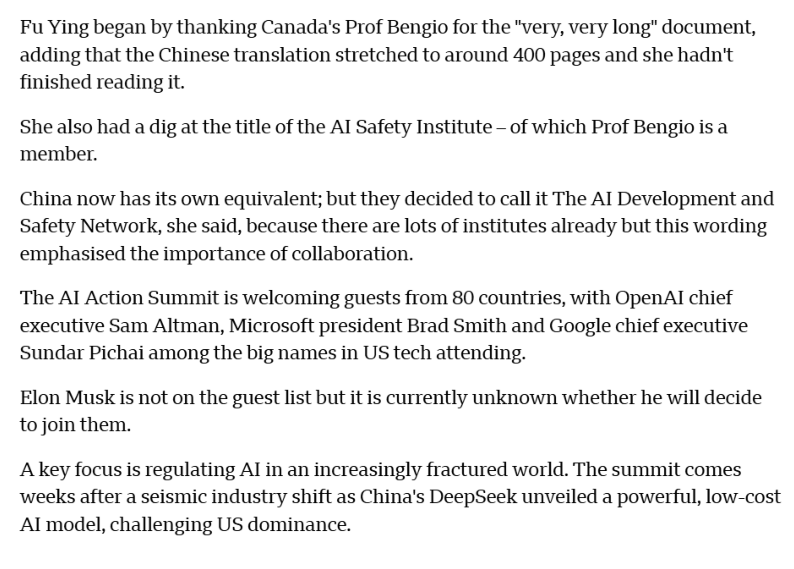

In [70]:
plt.figure(figsize=(10,10))
plt.imshow(tf.squeeze(img_a), cmap='gray')
plt.axis('off')
plt.show()

## b) Load 'AI.png' [GIVEN]


In [71]:
# Read image in TensorFlow
img_path = '/content/AI.png'
img0 = cv.imread(img_path)
img = cv.cvtColor(img0, cv.COLOR_BGR2GRAY)
img = tf.convert_to_tensor(img, dtype=tf.uint16)

In [72]:
# Change data type of image using TensorFlow and apply 1x1 identity kernal
img_b = tf.cast(img, tf.float32)  # Convert image to float32
img_b = tf.nn.conv2d( tf.reshape(img_b, (1,img_b.shape[0],img_b.shape[1],1)),\
                     tf.reshape(kernel_sz1,\
                      (kernel_sz1.shape[0],kernel_sz1.shape[1],1,1)),\
                      strides=[1, 1, 1, 1], padding='SAME')

In [73]:
print(img_b.shape)

(1, 18, 28, 1)


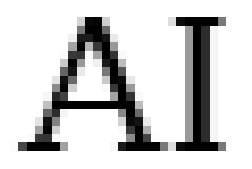

In [74]:
plt.figure(figsize=(3,3))
plt.imshow(tf.squeeze(img_b), cmap='gray')
plt.axis('off')
plt.show()

#c) Threshold both images at $(intensity<=228)$ intensity value and visulize the both outputs [2 Marks]

Store it both output images as $img\_a1$ and $img\_b1$ respectively. \\
Use ONLY tensorflow/pytorch operations.

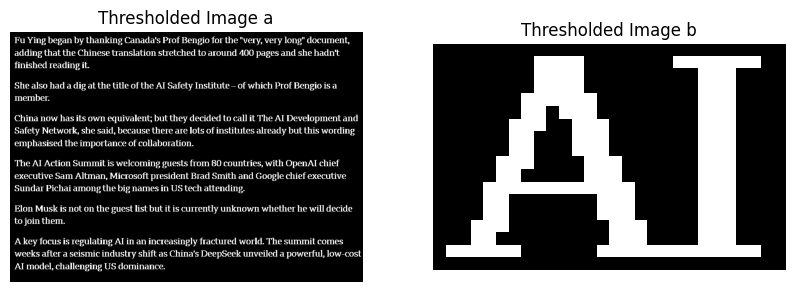

In [75]:
img_a1 = tf.where(img_a <= 228, 1.0, 0.0)
img_b1 = tf.where(img_b <= 228, 1.0, 0.0)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(tf.squeeze(img_a1), cmap='gray')
plt.title('Thresholded Image a')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(tf.squeeze(img_b1), cmap='gray')
plt.title('Thresholded Image b')
plt.axis('off')

plt.show()


#d) Convolve $img\_a1$ with $img\_b1$ and threshold the output at $(maximum\_of\_output - 25)$ and store the output in $img\_d$. Visualize it. [4 Marks]

Use ONLY tensorflow/pytorch operations.

img_a1 shape: (1, 650, 917, 1)
kernel shape: (18, 28, 1, 1)


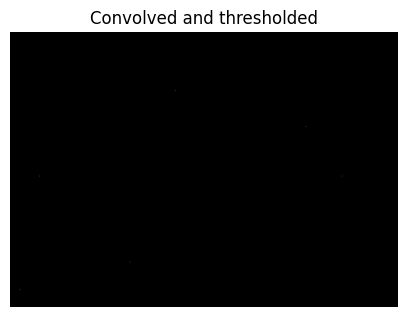

In [108]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Convert images to float32 and ensure correct dimensions
img_a1 = tf.cast(img_a1, tf.float32)
img_b1 = tf.cast(img_b1, tf.float32)

# Ensure img_a1 has batch and channel dimensions
if len(img_a1.shape) == 2:
    img_a1 = tf.expand_dims(img_a1, axis=0)  # Add batch dimension
    img_a1 = tf.expand_dims(img_a1, axis=-1)  # Add channel dimension

# Ensure img_b1 has the correct shape for convolution
kernel = tf.squeeze(img_b1, axis=0)  # Remove batch dimension if present
kernel = tf.reshape(kernel, [kernel.shape[0], kernel.shape[1], 1, 1])  # [h, w, in_channels, out_channels]

print("img_a1 shape:", img_a1.shape)
print("kernel shape:", kernel.shape)

# Perform convolution
img_d = tf.nn.conv2d(img_a1, kernel, strides=[1, 1, 1, 1], padding='SAME')

# Normalize img_d before thresholding
img_d = (img_d - tf.reduce_min(img_d)) / (tf.reduce_max(img_d) - tf.reduce_min(img_d)) * 255

# Apply a more forgiving threshold
threshold = tf.reduce_max(img_d)-25 # Lowering the threshold
img_d = tf.where(img_d < threshold, 0.0, 1.0)

# Convert tensor to NumPy for visualization
img_d_np = img_d.numpy().squeeze()

# Display the result
plt.figure(figsize=(5, 5))
plt.imshow(img_d_np, cmap='gray')
plt.title('Convolved and thresholded')
plt.axis('off')
plt.show()



#e) Convolve this output with reflection of AI (around origin) and visualize it. [4 Marks]
### [Hint: Use $tf.reverse(x,axis)$ function]

Use ONLY tensorflow/pytorch operations.

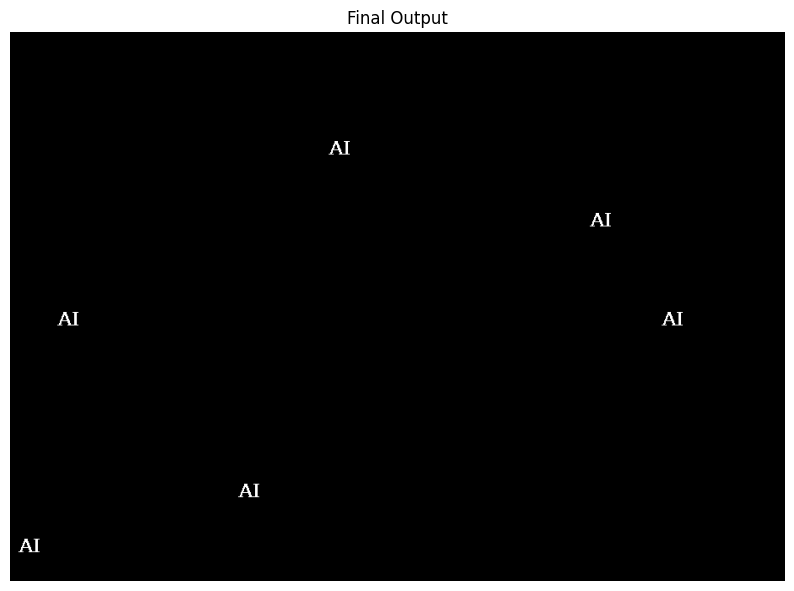

In [109]:
img_b1_reflected = tf.reverse(img_b1, axis=[1, 2])

# Perform convolution with the reflected image
img_final = tf.nn.conv2d(tf.reshape(img_d, (1, img_d.shape[1], img_d.shape[2], 1)),
                         tf.reshape(img_b1_reflected, (img_b1_reflected.shape[1], img_b1_reflected.shape[2], 1, 1)),
                         strides=[1, 1, 1, 1], padding='SAME')

# Visualize the result
plt.figure(figsize=(10, 10))
plt.imshow(tf.squeeze(img_final), cmap='gray')
plt.axis('off')
plt.title('Final Output')
plt.show()